# Pytorch Core

## Tensor
It is the buildiing block of Pytorch.

https://www.youtube.com/watch?v=exaWOE8jvy8&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=2

In [2]:
import torch

x = torch.zeros(2,2)
x = torch.rand(2,2, dtype=float)

print(x)
print(x.shape)

tensor([[0.8810, 0.0778],
        [0.0578, 0.1060]], dtype=torch.float64)
torch.Size([2, 2])


In [2]:
x = torch.rand(2,2, dtype=float)
y = torch.rand(2,2, dtype=float)
print(x)
print(y)
print(torch.add(x,y))
print(y.add_(x))

tensor([[0.1542, 0.5104],
        [0.6314, 0.7296]], dtype=torch.float64)
tensor([[0.4904, 0.2451],
        [0.4317, 0.4207]], dtype=torch.float64)
tensor([[0.6445, 0.7555],
        [1.0631, 1.1502]], dtype=torch.float64)
tensor([[0.6445, 0.7555],
        [1.0631, 1.1502]], dtype=torch.float64)


In [3]:
x = torch.rand(5,5, dtype=float)
print(x)
print(x[:,0]) # column 1
print(x[1,:]) # row 2

tensor([[0.9129, 0.0470, 0.7192, 0.5962, 0.7791],
        [0.7525, 0.0093, 0.1599, 0.8307, 0.3251],
        [0.7129, 0.4777, 0.4677, 0.9973, 0.5352],
        [0.2454, 0.8245, 0.1487, 0.6640, 0.0194],
        [0.2741, 0.3749, 0.4508, 0.1222, 0.6979]], dtype=torch.float64)
tensor([0.9129, 0.7525, 0.7129, 0.2454, 0.2741], dtype=torch.float64)
tensor([0.7525, 0.0093, 0.1599, 0.8307, 0.3251], dtype=torch.float64)


In [ ]:
x = torch.rand(4,4, dtype=float)
y = x.view(16)
print(y) # reshaped to 1d

z = x.view(-1,8)  # reshaped to 2 x 8 = 16, but share the same memory
print(z) 

z = x.view(-1,2)  # reshaped to 8 x 2 = 16, but share the same memory
print(z) 

z.add_(1)
print(x)

tensor([0.6275, 0.3504, 0.2219, 0.3436, 0.9094, 0.5755, 0.9027, 0.1062, 0.3673,
        0.6449, 0.3486, 0.1216, 0.8197, 0.5453, 0.8296, 0.6508],
       dtype=torch.float64)
tensor([[0.6275, 0.3504, 0.2219, 0.3436, 0.9094, 0.5755, 0.9027, 0.1062],
        [0.3673, 0.6449, 0.3486, 0.1216, 0.8197, 0.5453, 0.8296, 0.6508]],
       dtype=torch.float64)
tensor([[0.6275, 0.3504],
        [0.2219, 0.3436],
        [0.9094, 0.5755],
        [0.9027, 0.1062],
        [0.3673, 0.6449],
        [0.3486, 0.1216],
        [0.8197, 0.5453],
        [0.8296, 0.6508]], dtype=torch.float64)
tensor([[1.6275, 1.3504, 1.2219, 1.3436],
        [1.9094, 1.5755, 1.9027, 1.1062],
        [1.3673, 1.6449, 1.3486, 1.1216],
        [1.8197, 1.5453, 1.8296, 1.6508]], dtype=torch.float64)


In [4]:
import torch

a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

a.add_(1)
print(b) # a & b share same memory

if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(5, device=device) #puts the tensor in GPU
    y = torch.ones(5)
    y = y.to(device) #puts the tensor in GPU
    b = y
    z = y.add_(1)
    print(z)
    print(a)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2.]


In [10]:
x = torch.rand(2,3)
print(x)
print(x[1,1])
print(x[1,1].item())

tensor([[0.3909, 0.4889, 0.7304],
        [0.2730, 0.3525, 0.3596]])
tensor(0.3525)
0.35254836082458496


In [5]:
import torch

x = torch.ones(5, requires_grad=True) # this tells Autograd to calculate gradient that is needed for optimizing parameters in the tensor
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


## Autograd

In PyTorch, **autograd** is the automatic differentiation engine — the system that powers **backpropagation**.

It allows PyTorch to automatically compute **gradients** of tensors **with respect to some scalar loss function**, which is essential for training neural networks.



### Core Idea
When you perform operations on tensors that have requires_grad=True, PyTorch:

- Builds a computation graph dynamically — each tensor operation is tracked.

- Calculates gradients as you call .backward(), using the chain rule of calculus.

- Stores gradients in each tensor’s .grad attribute.

## What is Gradient?

A **gradient** is the rate of change of a function’s output with respect to its inputs.

In machine learning terms:
It tells you how much the loss changes when you tweak a model parameter (like a weight).

Mathematically:

If $ L = f(w) $, then $ \frac{dL}{dw} $ is the **gradient**.

### A Simple Example (1D)

Lets say the function is $ y = x^2 $

Gradient is
$$
\frac{dy}{dx} = 2x
$$

It means, if I increase x by 1, y will change by 2x which is 2.

### A Simple Example (Multi-dimension)
If the function depends on multiple inputs, the Loss Function is: $ L = f(w_1, w_2, w_3) $

In that case, the gradient is a vector of partial derivatives:
$$
\nabla L =
\begin{bmatrix}
\frac{\partial L}{\partial w_1}, &
\frac{\partial L}{\partial w_2}, &
\frac{\partial L}{\partial w_3}
\end{bmatrix}
$$
Each component tells how sensitive the loss is to that specific parameter.

In [7]:
import torch

x = torch.tensor(3.0, requires_grad=True)
y = x ** 2   # Here y is representing the Loss function.
y.backward()
print(x.grad)  # -> tensor(6.) --> It tells if input x change by 2, the loss function will change by 6.


tensor(6.)


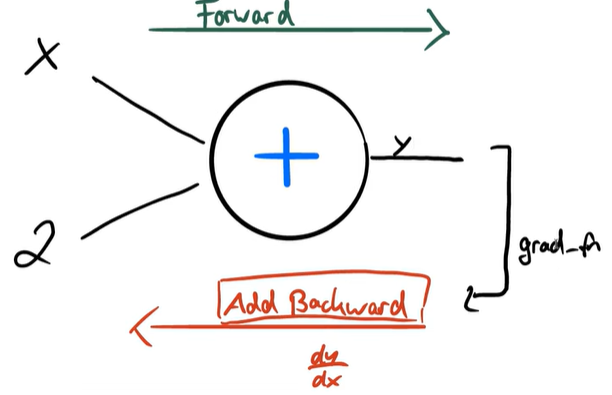

## Forward Propagation
**Forward propagation** (or the “forward pass”) is when data moves forward through the model to compute an output.

In math: $ y=f(x;w,b) $

- $x$: input
- $w,b$: parameters
- $y$: output (prediction)

In [8]:
x = torch.tensor([2.0]) # Is the input
w = torch.tensor([3.0], requires_grad=True) # Is the weight parameter which needs adjustment on back propagation. Hence requires_grad is set to True
b = torch.tensor([1.0], requires_grad=True) # Is the bias parameter which needs adjustment on back propagation. Hence requires_grad is set to True

y = w * x + b  # Forward pass

print(f"the result y = {y}")
print("PyTorch builds the computational graph behind the scenes as you perform these operations.")

the result y = tensor([7.], grad_fn=<AddBackward0>)
PyTorch builds the computational graph behind the scenes as you perform these operations.


## Backward Propagation (Backprop)

Once we compute a loss (how wrong the prediction was),
**backward propagation** computes gradients of that loss w.r.t. all parameters.

In [ ]:
loss = (y - 10)**2    # Suppose target = 10 --> this is the loss function
print(f"the loss = {loss}")
loss.backward()       # Backpropagation --> backward() calculates the gradients and assign to the parameters (w and b)
print(w.grad, b.grad) #


the loss = tensor([9.], grad_fn=<PowBackward0>)
tensor([-12.]) tensor([-6.])


**What happens internally:**

PyTorch traverses the computational graph in reverse order (from output → input).

It applies the chain rule to compute partial derivatives:
$$
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial w}
$$

$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial b}
$$

The computed gradients are stored in w.grad and b.grad.

## Autograd Workflow in Training

| Step                   | Description                  | PyTorch Function            |
| ---------------------- | ---------------------------- | --------------------------- |
| **1. Forward pass**    | Compute predictions          | Model call (`y = model(x)`) |
| **2. Compute loss**    | Compare prediction vs actual | `loss = loss_fn(y_pred, y_true)`   |
| **3. Backward pass**   | Compute gradients            | `loss.backward()`           |
| **4. Update weights**  | Adjust parameters            | `optimizer.step()`          |
| **5. Reset gradients** | Prevent accumulation         | `optimizer.zero_grad()`     |


In [ ]:
# a typical training loop
for data, target in dataloader:
    optimizer.zero_grad()       # 5️⃣ Reset gradients
    output = model(data)        # 1️⃣ Forward pass
    loss = loss_fn(output, target)  # 2️⃣ Compute loss
    loss.backward()             # 3️⃣ Backward pass caclulates the weight & bias gradients
    optimizer.step()            # 4️⃣ Update weights with the gradients


## Key Concept Summary

| Concept                 | Meaning                                                           |
| ----------------------- | ----------------------------------------------------------------- |
| **Autograd**            | Engine that builds the graph and computes gradients automatically |
| **Gradient**            | Partial derivative showing rate of change                         |
| **Forward pass**        | Compute outputs (predictions)                                     |
| **Backward pass**       | Compute gradients using chain rule                                |
| **Computational graph** | Dynamic structure tracking all tensor operations                  |
| **requires_grad**       | Enables gradient tracking for a tensor                            |
| **.backward()**         | Triggers gradient computation                                     |
| **.grad**               | Stores the resulting gradient                                     |
| **torch.no_grad()**     | Disables autograd (used during inference)                         |
| **.zero_grad()**     | Resets the gradients                         |


# A Demo : Learning a Linear Relationship from Data using PyTorch Autograd
Objective of this is to build a model and train it to find the

## Objective
This example demonstrates how a machine learning model can **learn the parameters (weight and bias)** of a simple linear relationship between input and output data using PyTorch’s automatic differentiation (autograd).

# Problem Setup
We assume a true underlying relationship:

$y = 2x + 3 $

But in the real world, data is often noisy.
So we generate sample data points $(x,y)$ with small random noise added.

The model **does not know** the true slope (2) or intercept (3).
It starts with **randomly initialized parameters** and learns them by minimizing the prediction error.

In [12]:
import torch

# 1️⃣ Setup
torch.manual_seed(24)  # For reproducibility

# 2️⃣ Generate synthetic data
N = 50       # Total data points
D_in = 1     # Input feature dimension
D_out = 1    # Output feature dimension

# True relationship: y = 2x + 3
true_m = torch.tensor([[2.0]])   # slope - m
true_c = torch.tensor([[3.0]])   # intercept - c

# Random Input data
X = torch.randn(N, D_in)

# Output data with noise
y_true = X @ true_m + true_c + 0.1 * torch.randn(N, D_out)

# 3️⃣ Split into Train/Test
train_ratio = 0.8
split_index = int(N * train_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_true[:split_index], y_true[split_index:]

print("Train size:", X_train.shape[0], " | Test size:", X_test.shape[0])

# 4️⃣ Initialize model parameters (random weights & bias)
w = torch.randn((D_in, D_out), requires_grad=True)
b = torch.randn((1, D_out), requires_grad=True)
print(f"Initial weights: {w}, Initial bias: {b}")

# 5️⃣ Define learning rate and number of epochs
learning_rate = 0.1
epochs = 200

# 6️⃣ Training loop
for epoch in range(epochs):
    # ==============================
    # 🔹 FORWARD PASS
    # ==============================
    y_pred = X_train @ w + b  # predictions on train data

    # ==============================
    # 🔹 LOSS CALCULATION
    # ==============================
    loss = torch.mean((y_pred - y_train) ** 2)  # Mean Squared Error

    # ==============================
    # 🔹 BACKWARD PASS
    # ==============================
    loss.backward()

    # ==============================
    # 🔹 WEIGHT UPDATE
    # ==============================
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Reset gradients for next iteration
    w.grad.zero_()
    b.grad.zero_()

    # ==============================
    # 🔹 LOGGING
    # ==============================
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1:03d} | Loss: {loss.item():.6f} | w: {w.item():.4f} | b: {b.item():.4f}")

# 7️⃣ Evaluation on Test Data
with torch.no_grad():
    y_test_pred = X_test @ w + b
    test_loss = torch.mean((y_test_pred - y_test) ** 2)

# 8️⃣ Compute R² Accuracy (goodness of fit)
ss_total = torch.sum((y_test - torch.mean(y_test)) ** 2)
ss_res = torch.sum((y_test - y_test_pred) ** 2)
r2_score = 1 - ss_res / ss_total

# 9️⃣ Results
print("\n✅ Training complete!")
print(f"Learned weight (slope): {w.item():.4f}")
print(f"Learned bias (intercept): {b.item():.4f}")
print(f"Test MSE Loss: {test_loss.item():.6f}")
print(f"R² Score (accuracy): {r2_score.item():.4f}")


Train size: 40  | Test size: 10
Initial weights: tensor([[0.8674]], requires_grad=True), Initial bias: tensor([[0.7352]], requires_grad=True)
Epoch 020 | Loss: 0.014096 | w: 1.9802 | b: 2.9579
Epoch 040 | Loss: 0.011418 | w: 2.0156 | b: 2.9853
Epoch 060 | Loss: 0.011416 | w: 2.0167 | b: 2.9856
Epoch 080 | Loss: 0.011416 | w: 2.0167 | b: 2.9856
Epoch 100 | Loss: 0.011416 | w: 2.0167 | b: 2.9856
Epoch 120 | Loss: 0.011416 | w: 2.0167 | b: 2.9856
Epoch 140 | Loss: 0.011416 | w: 2.0167 | b: 2.9856
Epoch 160 | Loss: 0.011416 | w: 2.0167 | b: 2.9856
Epoch 180 | Loss: 0.011416 | w: 2.0167 | b: 2.9856
Epoch 200 | Loss: 0.011416 | w: 2.0167 | b: 2.9856

✅ Training complete!
Learned weight (slope): 2.0167
Learned bias (intercept): 2.9856
Test MSE Loss: 0.006233
R² Score (accuracy): 0.9971


## Summary of Key Sections
| Step | Stage                | Code Area                                      |
| ---- | -------------------- | ---------------------------------------------- |
| 1️⃣  | **Forward Pass**     | `y_pred = X_train @ w + b`                     |
| 2️⃣  | **Loss Calculation** | `loss = torch.mean((y_pred - y_train) ** 2)`   |
| 3️⃣  | **Backward Pass**    | `loss.backward()`                              |
| 4️⃣  | **Weight Update**    | `w -= lr * w.grad` and `b -= lr * b.grad`      |
| 5️⃣  | **Evaluation**       | `test_loss` and `r2_score` on unseen test data |
